In [1]:
# import lib
import pandas as pd
import numpy as np
from facebook_scraper import get_posts

In [2]:
# Facebook scraper 
list_of_eateries = ['primadeli', 'Polar.Puffs.Cakes', 'oldchangkee1956','MrBeanSingapore','yakunkayatoastsg','toastboxsingapore','breadtalksingapore','DominosSG','singaporecanadianpizza','JollibeeSG','coffeebean.sg','StarbucksSingapore','lihosg','eachacupsingapore','KFC.SG','LongJohnSilvers.Sg','SubwaySingapore','mosburgersg','BurgerKingSG','PizzaHutSingapore','fishandco.sg'] # just insert Facebook page name into list
list_of_post = []

for eatery in list_of_eateries:
    for post in get_posts(eatery, pages=5): # pages = number of pages to scrape
        list_of_post.append(post)

print("Total number of post: ", len(list_of_post))

Total number of post:  378


In [3]:
# list_of_eateries = ['primadeli', 'Polar.Puffs.Cakes']
# list_of_post = []

# for eatery in list_of_eateries:
#     for post in get_posts(eatery, pages=3):
#         list_of_post.append(post)
# print("Total number of post: ", len(list_of_post))

In [4]:
# clean data
list_of_post_df = pd.DataFrame(list_of_post)
df = pd.DataFrame()

df['text'] = list_of_post_df['text']
df['label'] = "" # insert new label row
df.head()

,text,label
0,"The sweet, buttery Magic Christmas House Cooki...",
1,It’s time for a simple game of tic-tac-toe wit...,
2,Have you ever wondered where Santa lived at as...,
3,Our best-selling Truffle Yule Log returns to d...,
4,Our Hazelnut Yule Log Cake is not to be missed...,


In [5]:
# remove all blank post
df = df[df['text'] != ""]
print("number of empty rows: ", sum(df['text']== ""))

number of empty rows:  0


In [6]:
# remove all emoji, ignore error
import re

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

# deEmojify every post
for i in range(len(df['text'])):
    df['text'][i] = deEmojify(df['text'][i])

KeyError: 6

In [ ]:
# remove all links from post
count = 0
for message in df['text']:
    df['text'][count]= re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', "", message)
    count += 1

In [ ]:
# removing all apostrophe variations
apostrophe_1 = "’s"
apostrophe_2 = "'s"
apostrophe_3 = "’d"
apostrophe_4 = "'d"
apostrophe_5 = "’ll"
apostrophe_6 = "'ll"
apostrophe_7 = "’re"
apostrophe_8 = "'re"
apostrophe_9 = "n’t"
apostrophe_10 = "n't"
apostrophe_11 = "s'"
apostrophe_12 = "s’"

for i in range(len(df['text'])):
    df['text'][i] = df['text'][i].replace(apostrophe_1,"").replace(apostrophe_2,"").replace(apostrophe_3,"").replace(apostrophe_4,"").replace(apostrophe_5,"").replace(apostrophe_6,"").replace(apostrophe_7,"").replace(apostrophe_8,"").replace(apostrophe_9,"").replace(apostrophe_10,"").replace(apostrophe_11,"").replace(apostrophe_12,"")
df['text'][1]

In [ ]:
# remove all \n (new line formatting)
count = 0
for message in df['text']:
    df['text'][count] = message.replace('\n',' ')
    count += 1

df['text']

In [ ]:
# remove all non alphanumeric and spaces
for i in range(len(df['text'])):
    df['text'][i] = re.sub(r'[^A-Za-z0-9 ]+', '', df['text'][i])

In [ ]:
saved_file = pd.DataFrame()
saved_file['text'] = df['text']
saved_file['label'] = df['label']

In [ ]:
saved_file.head()

In [ ]:
# export as CSV for labeling
saved_file.to_csv('FB_post.csv')

In [193]:
# import after inserting labeling
df = pd.read_csv('FB_post.csv')
df = df.drop(['Unnamed: 0'],axis=1) # drop extra column
df.head()

,text,label
0,The sweet buttery Magic Christmas House Cookie...,Non
1,It time for a simple game of tictactoe with ou...,Non
2,Have you ever wondered where Santa lived at as...,Non
3,Our bestselling Truffle Yule Log returns to da...,Non
4,Our Hazelnut Yule Log Cake is not to be missed...,Non


In [194]:
# count number of unique deals and non-deals
df['label'].value_counts()

Non     296
Deal     82
Name: label, dtype: int64

In [195]:
# import snowball stemmer
from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')

# split the sentences to lists of words
df['stem_text'] = df['text'].str.split()

# snowball stem each word into a new column - 'stem_text'
df['stem_text'] = df['stem_text'].apply(lambda x: [s_stemmer.stem(y) for y in x])
df.head()

,text,label,stem_text
0,The sweet buttery Magic Christmas House Cookie...,Non,"[the, sweet, butteri, magic, christma, hous, c..."
1,It time for a simple game of tictactoe with ou...,Non,"[it, time, for, a, simpl, game, of, tictacto, ..."
2,Have you ever wondered where Santa lived at as...,Non,"[have, you, ever, wonder, where, santa, live, ..."
3,Our bestselling Truffle Yule Log returns to da...,Non,"[our, bestsel, truffl, yule, log, return, to, ..."
4,Our Hazelnut Yule Log Cake is not to be missed...,Non,"[our, hazelnut, yule, log, cake, is, not, to, ..."


In [196]:
# join all stemmed words into a single string in 'text' column
for i in range(len(df['text'])):
    df['text'][i] = ' '.join(df['stem_text'][i])

# drop column'stem_text'
df.drop(['stem_text'],axis=1)

,text,label
0,the sweet butteri magic christma hous cooki is...,Non
1,it time for a simpl game of tictacto with our ...,Non
2,have you ever wonder where santa live at as a ...,Non
3,our bestsel truffl yule log return to dazzl wi...,Non
4,our hazelnut yule log cake is not to be miss t...,Non
...,...,...
373,go crazi at the promo and deal happen onlin an...,Non
374,noth beat have a warm fragrant porridg for bre...,Non
375,long john silver at jurong point has move to w...,Non
376,wish all our hindu friend a happi deepavali ma...,Non


In [197]:
# remove all stopwords 
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# change all words in to lower form
for message in range(len(df['text'])):
    df['text'][message] = df['text'][message].lower()

# exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
print(df['text'])

0      sweet butteri magic christma hous cooki perfec...
1      time simpl game tictacto log cake paus gif get...
2      ever wonder santa live child present santa cot...
3      bestsel truffl yule log return dazzl decad cho...
4      hazelnut yule log cake miss fluffi vanilla spo...
                             ...                        
373    go crazi promo deal happen onlin offlin like c...
374    noth beat warm fragrant porridg breakfast avai...
375    long john silver jurong point move look forwar...
376    wish hindu friend happi deepavali may home liv...
377    last chanc savour exclus cheesi 7 durian origi...
Name: text, Length: 378, dtype: object


In [198]:
# train-test-split for modeling
from sklearn.model_selection import train_test_split

X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [199]:
# pipeline to allow transformation of data all together
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# MultinomialNB
from sklearn.naive_bayes import MultinomialNB
text_clf_MNB = Pipeline([('tfidf',TfidfVectorizer(analyzer='word')),('mnb',MultinomialNB())])
text_clf_MNB.fit(X_train,y_train)

# LinearSVC
from sklearn.svm import LinearSVC
text_clf_SVC = Pipeline([('tfidf',TfidfVectorizer(analyzer='word')),('svc',LinearSVC())])
text_clf_SVC.fit(X_train,y_train)

# Randomforest pipeline setup
from sklearn.ensemble import RandomForestClassifier
text_clf_RF = Pipeline([('tfidf',TfidfVectorizer(analyzer='word')),('rf',RandomForestClassifier())])
text_clf_RF.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])

In [200]:
# Setting params for TFIDF Vectorizer gridsearch
tf_params = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__min_df': (2, 3, 4),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1,2,3)]
}

# Setting up randomforest params
rf_params = {
 'tfidf__max_features':[2000],
 'tfidf__ngram_range': [(1, 2)],
 'tfidf__stop_words': ['english'],
 'rf__max_depth': [1000],
 'rf__min_samples_split': [100],
 'rf__max_leaf_nodes': [None]}

In [201]:
from sklearn.model_selection import GridSearchCV

# setting up GridSearch for MultinomialNB + fitting
MNB_gs = GridSearchCV(text_clf_MNB,param_grid=tf_params, cv = 5, verbose =1, n_jobs = -1)
MNB_gs.fit(X_train, y_train)

# setting up GridSearch for LinearSVC + fitting
SVC_gs = GridSearchCV(text_clf_SVC, param_grid=tf_params, cv = 5, verbose =1, n_jobs = -1)
SVC_gs.fit(X_train, y_train)

# setting up GridSearch for Randomforest + fitting
RF_gs = GridSearchCV(text_clf_SVC, param_grid=tf_params, cv = 5, verbose = 1, n_jobs = -1)
RF_gs.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 120 out of 135 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 135 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    0.5s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('svc', LinearSVC())]),
             n_jobs=-1,
             param_grid={'tfidf__max_df': (0.25, 0.5, 0.75),
                         'tfidf__min_df': (2, 3, 4),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 2, 3)]},
             verbose=1)

In [202]:
# prediction set for MultinomialNB and MultinomialNB GridSearchCV
predictions_MNB = text_clf_MNB.predict(X_test)
predictions_MNB_gs = MNB_gs.predict(X_test)

# prediction set for LinearSVC and LinearSVC GridSearchCV
predictions_SVC = text_clf_SVC.predict(X_test)
predictions_SVC_gs = SVC_gs.predict(X_test)

# prediction set for Randomforest and Randomforest GridSearchCV
predictions_RF = text_clf_RF.predict(X_test)
predictions_RF_gs = RF_gs.predict(X_test)

In [203]:
# Report the confusion matrix
from sklearn.metrics import confusion_matrix

# Confusion matrix for MultinomialNB and MultinomialNB GridSearchCV
cf_matrix_MNB = confusion_matrix(y_test, predictions_MNB)
cf_matrix_MNB_gs = confusion_matrix(y_test, predictions_MNB_gs)

# Confusion matrix for LinearSVC and LinearSVC GridSearchCV
cf_matrix_SVC = confusion_matrix(y_test, predictions_SVC)
cf_matrix_SVC_gs = confusion_matrix(y_test, predictions_SVC_gs)

# Confusion matrix for Randomforest and Randomforest GridSearchCV
cf_matrix_RF = confusion_matrix(y_test, predictions_RF)
cf_matrix_RF_gs = confusion_matrix(y_test, predictions_RF_gs)

MultinomialNB confusion martix


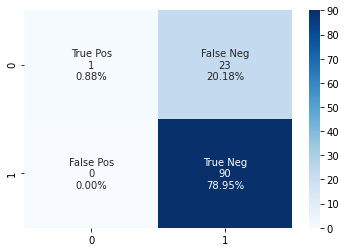

In [204]:
# MultinomialNB confusion matrix
import seaborn as sns

cf_matrix = cf_matrix_MNB

group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
print('\033[1m' + 'MultinomialNB confusion martix')
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

MultinomialNB GridSearchCV confusion martix


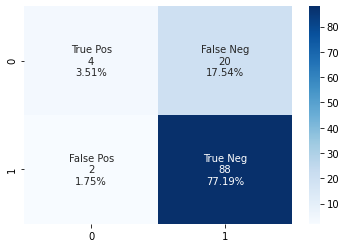

In [205]:
# Confusion matrix for MultinomialNB GridSearchCV

cf_matrix = cf_matrix_MNB_gs

group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
print('\033[1m' + 'MultinomialNB GridSearchCV confusion martix')
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

LinearSVC confusion martix


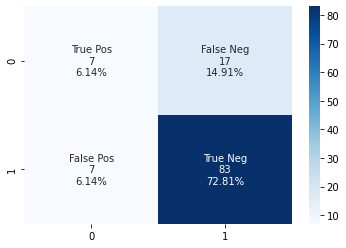

In [206]:
# Confusion matrix for LinearSVC

cf_matrix = cf_matrix_SVC

group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
print('\033[1m' + 'LinearSVC confusion martix')
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

LinearSVC GridSearchCV confusion martix


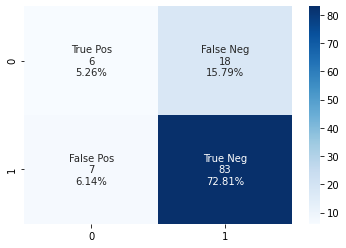

In [207]:
# Confusion matrix for LinearSVC GridSearchCV

cf_matrix = cf_matrix_SVC_gs

group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
print('\033[1m' + 'LinearSVC GridSearchCV confusion martix')
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

RandomForest confusion martix


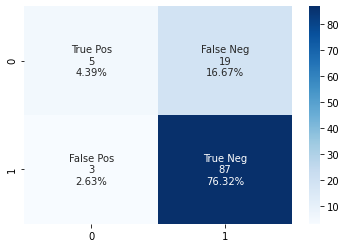

In [208]:
# Confusion matrix for Randomforest

cf_matrix = cf_matrix_RF

group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
print('\033[1m' + 'RandomForest confusion martix')
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

RandomForest GridSearchCV confusion martix


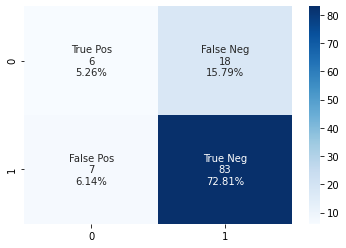

In [209]:
# Confusion matrix for Randomforest GridSearchCV

cf_matrix = cf_matrix_RF_gs

group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
print('\033[1m' + 'RandomForest GridSearchCV confusion martix')
sns.heatmap(cf_matrix_RF_gs, annot=labels, fmt='', cmap='Blues')

In [210]:
# classification report for all models
from sklearn import metrics
print('\033[1m' + 'MultinomialNB')
print(metrics.classification_report(y_test,predictions_MNB))
print('\n')

print('\033[1m' + 'MultinomialNB GridSearchCV')
print(metrics.classification_report(y_test,predictions_MNB_gs))
print('\n')

print('\033[1m' + 'LinearSVC')
print(metrics.classification_report(y_test,predictions_SVC))
print('\n')

print('\033[1m' + 'LinearSVC GridSearchCV')
print(metrics.classification_report(y_test,predictions_SVC_gs))
print('\n')

print('\033[1m' + 'Randomforest')
print(metrics.classification_report(y_test,predictions_RF))
print('\n')

print('\033[1m' + 'Randomforest GridSearchCV')
print(metrics.classification_report(y_test,predictions_RF_gs))

MultinomialNB
              precision    recall  f1-score   support

        Deal       1.00      0.04      0.08        24
         Non       0.80      1.00      0.89        90

    accuracy                           0.80       114
   macro avg       0.90      0.52      0.48       114
weighted avg       0.84      0.80      0.72       114



MultinomialNB GridSearchCV
              precision    recall  f1-score   support

        Deal       0.67      0.17      0.27        24
         Non       0.81      0.98      0.89        90

    accuracy                           0.81       114
   macro avg       0.74      0.57      0.58       114
weighted avg       0.78      0.81      0.76       114



LinearSVC
              precision    recall  f1-score   support

        Deal       0.50      0.29      0.37        24
         Non       0.83      0.92      0.87        90

    accuracy                           0.79       114
   macro avg       0.67      0.61      0.62       114
weighted avg       

In [93]:
# scoring on MultinomialNB and MultinomialNB GridSearchCV
print('MultinomialNB score: ', text_clf_MNB.score(X_train, y_train))
print('MultinomialNB GS score: ', MNB_gs.score(X_train, y_train))
print('\n')

# scoring on LinearSVC and LinearSVC GridSearchCV
print('LinearSVC score: ', text_clf_SVC.score(X_train, y_train))
print('LinearSVC GS score: ', SVC_gs.score(X_train, y_train))
print('\n')

# scoring on Randomforest and Randomforest GridSearchCV
print('Randomforest score: ', text_clf_RF.score(X_train, y_train))
print('Randomforest GS score: ', RF_gs.score(X_train, y_train))

MultinomialNB score:  0.9015151515151515
MultinomialNB GS score:  0.8939393939393939


LinearSVC score:  0.9962121212121212
LinearSVC GS score:  0.9962121212121212


Randomforest score:  0.9962121212121212
Randomforest GS score:  0.9962121212121212


In [76]:
# export model for use in FB_scraper
import pickle

filename = 'deals_classif.sav'
pickle.dump(
        RF_gs, 
        open(filename, 'wb'))